In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from dynamics_cart_pole import cart_pole
import pygame as pg
from scipy.optimize import minimize 
from pygame import gfxdraw
import cma

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Your code here
state_num=4
#action_num=100
order=3
d=(order+1)**state_num
#d_a=d*action_num
f_min=-10
f_max=10

def scale(state_):
    a_ = np.array([(state_[0]+50)/(100),(state_[1]+5)/(10),(state_[2]+2*np.pi)/(4*np.pi) ,(state_[3]+np.pi)/(2*np.pi) ])
    return a_

def create_c(k_,n_):#number of states, order
    c_ = [[] for j in range(k_)]
    for i in range(k_):
        for j in range(int(np.power(n_ + 1,i))):
            for p in range(n_ + 1):
                for r in range(int(np.power(n_ + 1,k_- i - 1))):
                    c_[i].append(p)
    c_ = np.array(c_,dtype = np.int8)
    return c_
c=create_c(state_num,order)

def create_x_i(s_): #for v_hat
    state = scale(s_)
    x_i_=np.cos(np.pi*(np.matmul(state,c)))
    return x_i_


def policy(st,theta_mu,theta_sigma):
    mu=np.matmul(theta_mu,create_x_i(st))
    sigma=np.exp(np.matmul(theta_sigma,create_x_i(st)))
    action=np.random.normal(mu,sigma,1)
    action=np.clip(action,f_min,f_max)
    return action


In [3]:
def reward(angle,x_in):
    return np.exp(0.5*((angle-(np.pi))**2+((2*np.pi/50)**2)*(x_in**2)))
global step_per_e
step_per_e=[]
def saving(cost_in):
    global step_per_e
    step_per_e=np.append(step_per_e,[cost_in])


def new(theta):
    theta_mu = theta[0:d]
    theta_sigma=theta[d:]
    episode = 0
    step = np.empty(0)
    #state_list = []
    #step_per_episode = []
    #reward_sum = []
    cart = cart_pole()
    t = 0
    action = np.empty(0)
    s = np.zeros((1,4))# states
    s[0] = [0,0,0,0]# 
    b=1
    total_cost=0
    while True :
        theta=np.append(theta_mu,theta_sigma)
        real_action=policy(s[t],theta_mu,theta_sigma)
        next_x,next_v,next_a_v, angle = cart.move(s[t][0], s[t][1],s[t][2], s[t][3], real_action)
        #print(real_action)
        s = np.append(s,[[next_x,next_v,next_a_v,angle]],axis=0)
        #print([next_x,next_v,next_a_v,angle],end=" ")
        cost_=reward(angle,next_x)
        total_cost+=cost_
        t += 1 
        if t>200:
            saving(t-1)
            break
        if (35/36)*np.pi<angle<(37/36)*np.pi and -0.25<x<0.25:
            counter+=1
        else:
            counter=0
        if counter==5:
            saving(t-1)
            break
    #step_per_episode.append(t)
    #state_list.append(s)
    #reward_sum.append(-t)
    #return state_list,step_per_episode , reward_sum
    return total_cost ,s#, state_list


In [4]:
iteration_num=100
run_number=10
def eval():
    sigma0=0.25
    costs=np.empty((1,iteration_num))
    t=0
    global step_per_e
    step_per_e=[]
    for i in range(run_number):
        theta=2*d*[0]
        es = cma.CMAEvolutionStrategy(theta, sigma0).optimize(new,iterations=iteration_num)
        res=es.result
        theta=res[0]
        #sigma0=np.average(res[-2])
        file=open("outcmaes/fit.dat")
        results=[]
        for line in file:
            results += [line.split()]
        results.pop(0)
        res1=np.array(results,dtype=float)
        costs = np.append(costs,[res1[:,5]],axis=0)
        t+=1
    return costs , es,theta
costs_, es, theta=eval()



(11_w,22)-aCMA-ES (mu_w=6.5,w_1=26%) in dimension 512 (seed=462607, Thu Apr  1 06:30:14 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     22 9.349136226307846e+03 1.0e+00 2.47e-01  2e-01  2e-01 0:10.0


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (84731.98148940045, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.92648627e-02, -3.78433919e-01,  1.07863008e+00,
         5.63679648e-02],
       [-6.23779626e-02, -4.72457200e-01,  1.03073059e+00,
         1.66260536e-01],
       [-1.13039878e-01, -5.33326814e-01,  5.89537915e-01,
         2.50429811e-01],
       [-1.73268589e-01, -6.67646805e-01,  1.80778504e-01,
         2.90455876e-01],
       [-2.45740173e-01, -7.82097235e-01, -3.34982163e-01,
         2.82506015e-01],
       [-3.28787891e-01, -8.83362989e-01, -7.90264886e-01,
         2.24156213e-01],
       [-4.23599402e-01, -1.02106352e+00, -9.13659617e-01,
         1.35539514e-01],
       [-5.34855939e-01, -1.21186048e+00, -6.17866673e-01,
         5.57998821e-02],
       [-6.63041893e-01, -1.356153

    2     44 8.889002370257587e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:20.0


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (40564.55229863289, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.79214727e-02, -5.48057193e-01,  1.56147773e+00,
         8.16866541e-02],
       [-9.90504354e-02, -8.52309202e-01,  1.96188221e+00,
         2.65860166e-01],
       [-1.86830686e-01, -8.93564684e-01,  1.06515043e+00,
         4.22270291e-01],
       [-2.81217027e-01, -9.91945076e-01,  2.46350245e-02,
         4.78363370e-01],
       [-3.71128714e-01, -8.06821085e-01, -1.75400450e+00,
         3.90031284e-01],
       [-4.48029800e-01, -7.49106526e-01, -2.73635984e+00,
         1.57507611e-01],
       [-5.20292992e-01, -7.32377734e-01, -2.82418295e+00,
         6.15008842e+00],
       [-6.76521542e-01, -2.38777161e+00,  2.59581446e+00,
         6.13913529e+00],
       [-9.12092428e-01, -2.292974

    3     66 6.386255353324690e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:30.2
    4     88 6.131102824034333e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:40.5
    5    110 5.806315529559353e+03 1.0e+00 2.36e-01  2e-01  2e-01 0:50.7
    6    132 5.235074999325795e+03 1.0e+00 2.34e-01  2e-01  2e-01 1:01.1
    7    154 4.747767600369858e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:11.3
    8    176 4.331575905797699e+03 1.0e+00 2.30e-01  2e-01  2e-01 1:21.6
    9    198 4.482796618094268e+03 1.0e+00 2.28e-01  2e-01  2e-01 1:32.0
   10    220 4.264561674635390e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:42.6
   11    242 4.370498345327635e+03 1.0e+00 2.25e-01  2e-01  2e-01 1:53.3
   12    264 4.155235541030647e+03 1.0e+00 2.24e-01  2e-01  2e-01 2:04.4
   14    308 4.094355530896980e+03 1.0e+00 2.21e-01  2e-01  2e-01 2:26.1
   16    352 3.782551175625354e+03 1.0e+00 2.18e-01  2e-01  2e-01 2:47.9
   18    396 3.710406960441569e+03 1.0e+00 2.16e-01  2e-01  2e-01 3:09.7
   20    440 3.742461173302631e+03 1.0e+00 2.14e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (29652.16494641691, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.13707233e-02, -4.19732634e-01,  1.19624191e+00,
         6.25279824e-02],
       [-7.64117530e-02, -6.64712583e-01,  1.54000975e+00,
         2.05392187e-01],
       [-1.47920452e-01, -7.54531827e-01,  9.98011771e-01,
         3.37085505e-01],
       [-2.27612557e-01, -8.35845127e-01,  1.49493132e-01,
         3.96354206e-01],
       [-3.31849106e-01, -1.24658893e+00,  1.25182748e-01,
         4.10792819e-01],
       [-4.96020871e-01, -2.02681802e+00,  1.01259269e+00,
         4.70895377e-01],
       [-6.93133575e-01, -1.91577726e+00, -6.76485262e-01,
         4.88005505e-01],
       [-9.18463884e-01, -2.59430192e+00, -1.66533675e-01,
         4.44081031e-01],
       [-1.23534142e+00, -3.727151

    2     44 7.941260966758393e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:20.3


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (511072.01551791787, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-6.34798272e-03, -1.24776707e-01,  3.55759213e-01,
         1.85757184e-02],
       [-2.36988751e-02, -2.17432646e-01,  5.15856379e-01,
         6.40047624e-02],
       [-4.61570596e-02, -2.27651710e-01,  2.90796462e-01,
         1.05982696e-01],
       [-6.94233060e-02, -2.36347375e-01, -2.30329030e-02,
         1.19911160e-01],
       [-9.47901552e-02, -2.72256012e-01, -2.53083809e-01,
         1.05562471e-01],
       [-1.25272770e-01, -3.40129266e-01, -3.18734791e-01,
         7.58260736e-02],
       [-1.63936525e-01, -4.35649820e-01, -2.12651648e-01,
         4.81955568e-02],
       [-2.16881400e-01, -6.22719661e-01,  2.16277157e-01,
         4.84629940e-02],
       [-2.80626877e-01, -6.50356

    3     66 6.259455819740520e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:30.5
    4     88 5.961892713818797e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:40.8
    5    110 5.589239026340691e+03 1.0e+00 2.36e-01  2e-01  2e-01 0:51.0
    6    132 4.914684511479740e+03 1.0e+00 2.34e-01  2e-01  2e-01 1:01.4
    7    154 5.056604788426373e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:11.5
    8    176 4.648191453614149e+03 1.0e+00 2.30e-01  2e-01  2e-01 1:21.7
    9    198 4.959922352593075e+03 1.0e+00 2.28e-01  2e-01  2e-01 1:31.8
   10    220 4.180411278960044e+03 1.0e+00 2.26e-01  2e-01  2e-01 1:41.9
   11    242 4.415536925992510e+03 1.0e+00 2.24e-01  2e-01  2e-01 1:52.4
   13    286 3.999900199413538e+03 1.0e+00 2.21e-01  2e-01  2e-01 2:12.9
   15    330 4.086205676565875e+03 1.0e+00 2.18e-01  2e-01  2e-01 2:33.3
   17    374 3.869602012015214e+03 1.0e+00 2.16e-01  2e-01  2e-01 2:54.4
   19    418 3.610835176920672e+03 1.0e+00 2.13e-01  2e-01  2e-01 3:15.3
   21    462 3.534323712652464e+03 1.0e+00 2.11e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (11481687.640466861, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-7.79554022e-02, -1.51529938e+00,  4.29564437e+00,
         2.27706636e-01],
       [-2.19786076e-01, -1.30793487e+00,  2.54297054e+00,
         5.78684105e-01],
       [-3.53204860e-01, -1.36513689e+00,  8.28298836e-01,
         7.50154251e-01],
       [-4.76445514e-01, -1.09534280e+00, -1.76911073e+00,
         7.02956045e-01],
       [-6.27213702e-01, -1.93663432e+00, -1.41208285e+00,
         5.36462126e-01],
       [-8.78176387e-01, -3.09103138e+00,  2.49902272e-01,
         4.75055247e-01],
       [-1.15151556e+00, -2.36932267e+00, -2.95062816e+00,
         3.38856987e-01],
       [-1.45478003e+00, -3.72197162e+00,  2.86519480e-01,
         1.97283937e-01],
       [-1.89410164e+00, -5.00000

    2     44 7.935130461800158e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:19.6


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (8636.07576554983, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.34479296e-03, -6.57493006e-02,  1.87467562e-01,
         9.78775226e-03],
       [-1.78952187e-02, -2.20830941e-01,  5.74720986e-01,
         4.95492365e-02],
       [-5.86385507e-02, -5.81641952e-01,  1.37626572e+00,
         1.51550076e-01],
       [-1.23940078e-01, -7.11835958e-01,  1.11926776e+00,
         2.81390998e-01],
       [-2.03358435e-01, -8.69409743e-01,  6.10779184e-01,
         3.71118949e-01],
       [-2.84183725e-01, -7.47698885e-01, -8.15263241e-01,
         3.60579847e-01],
       [-3.35875727e-01, -2.93941693e-01, -2.93862533e+00,
         1.67776976e-01],
       [-4.37329682e-01, -1.74657607e+00,  1.14708885e+00,
         7.38394660e-02],
       [-5.76695000e-01, -1.0429320

    3     66 7.905299221277943e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:29.6
    4     88 5.935952406221711e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:39.8
    5    110 6.571308427576030e+03 1.0e+00 2.36e-01  2e-01  2e-01 0:50.1
    6    132 5.722908074599578e+03 1.0e+00 2.34e-01  2e-01  2e-01 1:00.3
    7    154 5.063458420194627e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:10.5
    8    176 5.446232390266105e+03 1.0e+00 2.30e-01  2e-01  2e-01 1:20.6
    9    198 4.922126223666526e+03 1.0e+00 2.28e-01  2e-01  2e-01 1:31.0
   10    220 5.254311982034495e+03 1.0e+00 2.26e-01  2e-01  2e-01 1:41.3
   11    242 4.772850995509826e+03 1.0e+00 2.25e-01  2e-01  2e-01 1:51.8
   13    286 4.174716884367880e+03 1.0e+00 2.22e-01  2e-01  2e-01 2:12.4
   15    330 4.230682053363417e+03 1.0e+00 2.19e-01  2e-01  2e-01 2:33.1
   17    374 4.133744191110733e+03 1.0e+00 2.17e-01  2e-01  2e-01 2:53.7
   19    418 3.949263284433267e+03 1.0e+00 2.15e-01  2e-01  2e-01 3:14.3
   21    462 3.686650432288375e+03 1.0e+00 2.13e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (6429348905.824439, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.51350910e-02,  4.93502890e-01, -1.40624832e+00,
         6.20964716e+00],
       [ 4.12185503e-02, -1.71946029e-01,  8.90453890e-01,
         6.18323556e+00],
       [-5.22647223e-02, -1.64196664e+00,  5.20971265e+00,
         2.21748622e-01],
       [-2.38144024e-01, -2.00550869e+00,  4.82284531e+00,
         7.46271935e-01],
       [-4.21679592e-01, -1.71064785e+00,  1.91901103e+00,
         1.08223890e+00],
       [-5.70123858e-01, -1.26479261e+00, -1.31609522e+00,
         1.11196709e+00],
       [-6.61183253e-01, -4.93208800e-01, -5.05951336e+00,
         7.99234152e-01],
       [-6.87266795e-01, -6.75116752e-02, -6.28318531e+00,
         1.53726699e-01],
       [-7.20997554e-01, -6.870822

    2     44 1.054899400104218e+04 1.0e+00 2.44e-01  2e-01  2e-01 0:19.8


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1084716.3440379489, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.76918140e-02,  1.51028670e+00, -4.28159674e+00,
         6.05624589e+00],
       [ 1.42381046e-01, -1.95968693e-01,  1.52597587e+00,
         5.92007484e+00],
       [ 1.10342173e-01, -4.28922214e-01,  2.95258690e+00,
         6.15149358e+00],
       [ 7.30743419e-02, -2.82054927e-01,  2.47240190e+00,
         1.51672068e-01],
       [ 3.83200182e-02, -3.90821463e-01,  1.99859373e+00,
         3.84129569e-01],
       [-5.82296581e-03, -4.86175419e-01,  9.25518575e-01,
         5.34604820e-01],
       [-1.58356897e-02,  2.92908545e-01, -2.56950364e+00,
         4.52348027e-01],
       [ 7.21423345e-02,  1.44086546e+00, -6.28318531e+00,
         6.26538857e+00],
       [ 1.61317791e-01,  3.31470

    3     66 7.958978784706295e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:29.8
    4     88 7.918078958533915e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:39.8
    5    110 8.207954270033446e+03 1.0e+00 2.36e-01  2e-01  2e-01 0:49.9
    6    132 7.267930949331438e+03 1.0e+00 2.34e-01  2e-01  2e-01 0:59.9
    7    154 6.070616822080965e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:09.8
    8    176 5.976168689587666e+03 1.0e+00 2.30e-01  2e-01  2e-01 1:19.8
    9    198 5.270529646556905e+03 1.0e+00 2.28e-01  2e-01  2e-01 1:29.9
   10    220 5.020372313126694e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:39.9
   11    242 4.897542650099585e+03 1.0e+00 2.25e-01  2e-01  2e-01 1:50.2
   13    286 4.856634581348400e+03 1.0e+00 2.22e-01  2e-01  2e-01 2:10.5
   15    330 4.235372326241098e+03 1.0e+00 2.19e-01  2e-01  2e-01 2:30.9
   17    374 4.185822452194083e+03 1.0e+00 2.17e-01  2e-01  2e-01 2:51.4
   19    418 3.566398325307591e+03 1.0e+00 2.14e-01  2e-01  2e-01 3:11.8
   21    462 3.751832607632789e+03 1.0e+00 2.12e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (2159411282933.9243, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.52684030e-03,  1.28291789e-01, -3.65780477e-01,
         6.26408622e+00],
       [ 1.66264710e-02,  7.14950594e-02, -9.71426524e-02,
         6.24001533e+00],
       [ 2.93523132e-02,  1.80792299e-01, -2.73362839e-01,
         6.22067517e+00],
       [ 1.29809513e-02, -4.98505237e-01,  1.87640332e+00,
         2.11212602e-02],
       [-1.93443452e-02, -1.38011456e-01,  5.22266912e-01,
         1.45506391e-01],
       [-2.06481517e-02,  1.10726325e-01, -6.60817006e-01,
         1.38227753e-01],
       [ 5.38202968e-03,  3.97461334e-01, -1.76541208e+00,
         1.20240726e-02],
       [ 5.66099169e-02,  6.03131387e-01, -2.12545727e+00,
         6.09199712e+00],
       [ 1.81679138e-01,  1.81334

    2     44 7.495563670743838e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:19.2


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (22801.502413664228, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.67713328e-02,  3.29507979e-01, -9.39261274e-01,
         6.23411195e+00],
       [ 5.64887481e-02,  4.54038617e-01, -1.01868586e+00,
         6.13205909e+00],
       [ 9.30534795e-02,  2.74082062e-01,  5.39007485e-02,
         6.08217978e+00],
       [ 1.26701923e-01,  4.00021138e-01,  2.53241591e-01,
         6.09809983e+00],
       [ 1.85295899e-01,  7.70557340e-01, -3.07225953e-01,
         6.09513066e+00],
       [ 2.72537699e-01,  9.70700072e-01, -2.98607721e-01,
         6.06351457e+00],
       [ 3.77449340e-01,  1.12538816e+00, -7.50140773e-02,
         6.04403347e+00],
       [ 5.04849822e-01,  1.42032560e+00, -2.16928374e-01,
         6.02870614e+00],
       [ 6.58668827e-01,  1.65381

    3     66 7.353467987248978e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:28.8
    4     88 6.464573156534910e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:38.4
    5    110 5.914671847717843e+03 1.0e+00 2.36e-01  2e-01  2e-01 0:48.2
    6    132 5.552327544613600e+03 1.0e+00 2.34e-01  2e-01  2e-01 0:58.2
    7    154 5.074554129935336e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:08.2
    8    176 5.573101170671222e+03 1.0e+00 2.30e-01  2e-01  2e-01 1:18.3
    9    198 5.633812982760752e+03 1.0e+00 2.28e-01  2e-01  2e-01 1:28.2
   10    220 5.529466209064263e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:38.0
   11    242 4.777323469302232e+03 1.0e+00 2.25e-01  2e-01  2e-01 1:48.1
   13    286 4.511937888503281e+03 1.0e+00 2.22e-01  2e-01  2e-01 2:08.1
   15    330 4.140301501516361e+03 1.0e+00 2.19e-01  2e-01  2e-01 2:28.1
   17    374 3.861653146825785e+03 1.0e+00 2.17e-01  2e-01  2e-01 2:48.3
   19    418 4.128899864978956e+03 1.0e+00 2.14e-01  2e-01  2e-01 3:08.5
   21    462 3.950123981529334e+03 1.0e+00 2.12e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1310248760035.6277, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.50830210e-02,  2.96367896e-01, -8.44839900e-01,
         6.23905128e+00],
       [ 1.56943260e-02, -2.81640438e-01,  1.04741832e+00,
         6.24981442e+00],
       [-4.78792164e-03, -1.20202701e-01,  5.28011649e-01,
         4.85943609e-02],
       [-1.14140852e-02, -1.00149915e-02,  1.66169652e-03,
         7.60969542e-02],
       [-7.75280132e-02, -1.27727135e+00,  3.36211582e+00,
         2.54681156e-01],
       [-1.66962144e-01, -5.19279995e-01,  1.78978518e-01,
         4.33554869e-01],
       [-2.13135382e-01, -4.05581682e-01, -1.32519420e+00,
         3.74790373e-01],
       [-3.18628293e-01, -1.70115622e+00,  1.30620491e+00,
         3.74263609e-01],
       [-4.82854799e-01, -1.58260

    2     44 6.925873940899502e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:20.0


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (465737.08776134043, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.57520680e-03,  8.99341333e-02, -2.56422075e-01,
         6.26979708e+00],
       [ 4.60605461e-04, -1.69967057e-01,  5.59443389e-01,
         2.49413677e-03],
       [-6.38823536e-03,  3.47073343e-02, -1.12548160e-01,
         2.56672143e-02],
       [ 2.70226585e-03,  1.43765169e-01, -4.78934024e-01,
         6.27801569e+00],
       [ 6.24286610e-03, -7.36530892e-02,  2.25180262e-01,
         6.26490006e+00],
       [-1.58094662e-02, -3.59795256e-01,  1.05921535e+00,
         4.87380289e-02],
       [-2.97254764e-02,  8.28043332e-02, -4.89563572e-01,
         7.81202055e-02],
       [-1.75073342e-02,  1.54555300e-01, -8.41207216e-01,
         8.82544615e-03],
       [-9.60853230e-04,  1.67819

    3     66 6.945428662786272e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:30.1
    4     88 5.795145457290342e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:40.2
    5    110 5.830308628842982e+03 1.0e+00 2.36e-01  2e-01  2e-01 0:50.5
    6    132 5.535569827050819e+03 1.0e+00 2.34e-01  2e-01  2e-01 1:00.9
    7    154 5.491758069289578e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:11.2
    8    176 5.089769892250617e+03 1.0e+00 2.30e-01  2e-01  2e-01 1:21.7
    9    198 4.657813000963648e+03 1.0e+00 2.28e-01  2e-01  2e-01 1:32.0
   10    220 4.512241456144848e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:42.3
   11    242 4.253161545937165e+03 1.0e+00 2.25e-01  2e-01  2e-01 1:52.8
   13    286 4.005848415658281e+03 1.0e+00 2.22e-01  2e-01  2e-01 2:13.3
   15    330 3.695007332801782e+03 1.0e+00 2.19e-01  2e-01  2e-01 2:34.1
   17    374 3.448751139210601e+03 1.0e+00 2.17e-01  2e-01  2e-01 2:55.1
   19    418 3.389547904215779e+03 1.0e+00 2.15e-01  2e-01  2e-01 3:16.1
   21    462 3.284734213511370e+03 1.0e+00 2.13e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (430328376719.3984, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.79554022e-02,  1.51529938e+00, -4.29564437e+00,
         6.05547867e+00],
       [ 2.83314353e-01,  2.47631135e+00, -5.52313918e+00,
         5.53210296e+00],
       [ 5.16031915e-01,  2.23070970e+00, -2.66035411e+00,
         5.12376241e+00],
       [ 7.32396394e-01,  2.11750137e+00,  2.40651374e-01,
         5.00318559e+00],
       [ 9.20636895e-01,  1.61070093e+00,  3.53707855e+00,
         5.18948951e+00],
       [ 1.07105467e+00,  1.35388297e+00,  6.28293582e+00,
         5.68182318e+00],
       [ 1.19542908e+00,  1.28061617e+00,  6.28318531e+00,
         1.09126974e-01],
       [ 1.34843410e+00,  1.80503905e+00,  3.74724361e+00,
         6.23513077e-01],
       [ 1.53970389e+00,  1.998293

    2     44 7.201536459904946e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:19.9


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (7764.590689835081, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.64539889e-03,  1.30621791e-01, -3.72423119e-01,
         6.26373930e+00],
       [ 1.13916029e-02, -3.60573103e-02,  2.11370890e-01,
         6.25542846e+00],
       [-9.05847722e-04, -2.04513154e-01,  7.38532884e-01,
         2.17695595e-02],
       [-2.76437618e-02, -3.21180707e-01,  9.01942244e-01,
         1.07277139e-01],
       [-6.60216821e-02, -4.37392258e-01,  7.99385967e-01,
         1.95881394e-01],
       [-1.12177395e-01, -4.81118983e-01,  2.61646249e-01,
         2.50946625e-01],
       [-1.50751377e-01, -2.93074978e-01, -9.93400995e-01,
         2.13096309e-01],
       [-1.50003080e-01,  2.89203935e-01, -3.08887186e+00,
         1.35312603e-03],
       [-1.09969316e-01,  4.685278

    3     66 6.182872209358299e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:29.7
    4     88 6.199148100320333e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:39.7
    5    110 5.228623906024604e+03 1.0e+00 2.37e-01  2e-01  2e-01 0:50.0
    6    132 5.159585326098926e+03 1.0e+00 2.34e-01  2e-01  2e-01 1:00.3
    7    154 4.754240729810727e+03 1.0e+00 2.33e-01  2e-01  2e-01 1:10.5
    8    176 5.039941145026890e+03 1.0e+00 2.31e-01  2e-01  2e-01 1:20.7
    9    198 4.685613444603538e+03 1.0e+00 2.29e-01  2e-01  2e-01 1:30.7
   10    220 4.388517674494937e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:40.7
   11    242 4.024435004905007e+03 1.0e+00 2.26e-01  2e-01  2e-01 1:50.8
   13    286 4.260771344482645e+03 1.0e+00 2.23e-01  2e-01  2e-01 2:11.3
   15    330 4.130337169420598e+03 1.0e+00 2.21e-01  2e-01  2e-01 2:31.5
   17    374 3.969308760704102e+03 1.0e+00 2.18e-01  2e-01  2e-01 2:51.9
   19    418 3.992893474081095e+03 1.0e+00 2.16e-01  2e-01  2e-01 3:12.3
   21    462 3.781667654013108e+03 1.0e+00 2.14e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1245798335.4643247, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-4.91048453e-03, -9.65240502e-02,  2.75210528e-01,
         1.43693249e-02],
       [-1.90118840e-02, -1.81561329e-01,  4.37188813e-01,
         5.15014040e-02],
       [-4.02956181e-02, -2.39676392e-01,  3.94679230e-01,
         9.48325471e-02],
       [-6.81353056e-02, -3.13508186e-01,  2.81439945e-01,
         1.30049738e-01],
       [-1.03713399e-01, -3.95902168e-01,  1.10131661e-01,
         1.50453769e-01],
       [-1.48502290e-01, -4.99226444e-01, -3.44437245e-02,
         1.54433504e-01],
       [-2.04723073e-01, -6.25546109e-01, -1.04250436e-01,
         1.47267389e-01],
       [-2.73836752e-01, -7.57548875e-01, -1.27540604e-01,
         1.35256241e-01],
       [-3.57025214e-01, -9.06810

    2     44 7.344958647908298e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:20.1


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (5438386.804807921, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-7.79554022e-02, -1.51529938e+00,  4.29564437e+00,
         2.27706636e-01],
       [-1.90111341e-01, -7.38334803e-01,  1.02901094e+00,
         4.96702497e-01],
       [-2.51641168e-01, -4.92787543e-01, -1.05940067e+00,
         4.95083763e-01],
       [-3.49354348e-01, -1.46597335e+00,  2.38559748e-01,
         4.52012132e-01],
       [-5.11116261e-01, -1.76855080e+00, -2.43686561e-01,
         4.51848353e-01],
       [-7.47348134e-01, -2.94023996e+00,  1.54940935e+00,
         5.21736556e-01],
       [-1.01375423e+00, -2.38978847e+00, -1.39820826e+00,
         5.29154167e-01],
       [-1.24060842e+00, -2.15144860e+00, -3.26081351e+00,
         2.90843454e-01],
       [-1.42289977e+00, -1.558377

    3     66 5.516540218681949e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:30.2
    4     88 4.782210930170142e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:40.1
    5    110 5.300115272453148e+03 1.0e+00 2.37e-01  2e-01  2e-01 0:50.4
    6    132 5.022041337041094e+03 1.0e+00 2.34e-01  2e-01  2e-01 1:00.6
    7    154 5.078679976267019e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:10.6
    8    176 4.796786628025856e+03 1.0e+00 2.31e-01  2e-01  2e-01 1:20.7
    9    198 4.533936678717330e+03 1.0e+00 2.29e-01  2e-01  2e-01 1:30.9
   10    220 4.152461736786250e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:40.8
   12    264 4.237394484060262e+03 1.0e+00 2.24e-01  2e-01  2e-01 2:00.6
   14    308 4.108264667749106e+03 1.0e+00 2.21e-01  2e-01  2e-01 2:20.8
   16    352 3.995499380486725e+03 1.0e+00 2.19e-01  2e-01  2e-01 2:41.3
   18    396 3.898221525167034e+03 1.0e+00 2.16e-01  2e-01  2e-01 3:01.9
   20    440 3.570864672121207e+03 1.0e+00 2.14e-01  2e-01  2e-01 3:22.3
   22    484 3.653560978435826e+03 1.0e+00 2.12e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (87030.31823318465, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.76426847e-02, -5.42600910e-01,  1.54595540e+00,
         8.08714139e-02],
       [-1.14221704e-01, -1.15449913e+00,  2.80871343e+00,
         3.09893693e-01],
       [-2.45993037e-01, -1.45764488e+00,  2.35794404e+00,
         5.78235244e-01],
       [-3.94865846e-01, -1.52357945e+00,  6.85495953e-01,
         7.33125708e-01],
       [-5.50423138e-01, -1.58624469e+00, -1.15431570e+00,
         7.09372725e-01],
       [-7.17664062e-01, -1.75928422e+00, -2.46255067e+00,
         5.24263543e-01],
       [-9.01080454e-01, -1.93311844e+00, -3.08175804e+00,
         2.36650819e-01],
       [-1.10995269e+00, -2.28061426e+00, -2.30676554e+00,
         6.23785690e+00],
       [-1.36003311e+00, -2.731280

    2     44 6.186472946011410e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:19.9


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (7401.4970534508575, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.03496015e-02, -3.99709596e-01,  1.13922333e+00,
         5.95410790e-02],
       [-8.60521702e-02, -8.90885170e-01,  2.19298678e+00,
         2.34211358e-01],
       [-1.95071414e-01, -1.26342744e+00,  2.23717781e+00,
         4.65500198e-01],
       [-3.62648219e-01, -2.05630619e+00,  2.58362069e+00,
         7.18512970e-01],
       [-6.13229388e-01, -2.94095048e+00,  2.14561812e+00,
         9.64557641e-01],
       [-8.39364723e-01, -1.57840627e+00, -2.55449669e+00,
         9.44692716e-01],
       [-9.41944426e-01, -3.84030109e-01, -6.28318531e+00,
         4.68353678e-01],
       [-9.59077597e-01, -1.27481349e-01, -6.28318531e+00,
         6.02864009e+00],
       [-9.92258565e-01, -5.38993

    3     66 6.609473721479335e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:30.0
    4     88 6.549057197791471e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:40.3
    5    110 6.289303258998808e+03 1.0e+00 2.36e-01  2e-01  2e-01 0:50.5
    6    132 6.303466079503857e+03 1.0e+00 2.34e-01  2e-01  2e-01 1:00.8
    7    154 5.773929860289779e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:11.2
    8    176 5.539850398585783e+03 1.0e+00 2.30e-01  2e-01  2e-01 1:21.6
    9    198 5.602443260067739e+03 1.0e+00 2.29e-01  2e-01  2e-01 1:32.0
   10    220 5.166139456970200e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:42.5
   11    242 5.012981530374347e+03 1.0e+00 2.25e-01  2e-01  2e-01 1:52.9
   13    286 4.641087912578158e+03 1.0e+00 2.22e-01  2e-01  2e-01 2:13.3
   15    330 4.290138224070607e+03 1.0e+00 2.20e-01  2e-01  2e-01 2:33.7
   17    374 4.009647056052835e+03 1.0e+00 2.18e-01  2e-01  2e-01 2:54.3
   19    418 4.034263433424662e+03 1.0e+00 2.15e-01  2e-01  2e-01 3:14.8
   21    462 3.624059937464741e+03 1.0e+00 2.13e-01

/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (13252.456307816046, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-5.46783082e-03, -1.07478468e-01,  3.06442162e-01,
         1.60002336e-02],
       [-2.31592087e-02, -2.41223073e-01,  5.98018010e-01,
         6.31640093e-02],
       [-5.43202024e-02, -3.74715764e-01,  7.13208261e-01,
         1.31517917e-01],
       [-9.71754163e-02, -4.76003685e-01,  5.28065416e-01,
         1.96130202e-01],
       [-1.47058415e-01, -5.19152452e-01,  2.67921309e-02,
         2.24943392e-01],
       [-1.96559028e-01, -4.73771172e-01, -7.29184113e-01,
         1.88524692e-01],
       [-2.35558655e-01, -3.17217558e-01, -1.59168627e+00,
         6.79550203e-02],
       [-2.52061174e-01, -3.72741480e-02, -2.34606076e+00,
         6.14547107e+00],
       [-2.50436921e-01,  4.88909

    2     44 8.121474949779847e+03 1.0e+00 2.44e-01  2e-01  2e-01 0:19.7


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (70594.62226105959, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.36752314e-02,  2.68726810e-01, -7.66075196e-01,
         6.24317009e+00],
       [ 1.15508417e-01,  1.70498929e+00, -4.57666579e+00,
         5.95814954e+00],
       [ 2.57694271e-01,  1.15403980e+00, -1.70888516e+00,
         5.64109979e+00],
       [ 4.22750822e-01,  2.12653729e+00, -1.90049098e+00,
         5.45175163e+00],
       [ 6.05960451e-01,  1.54248938e+00,  1.48113621e+00,
         5.43115998e+00],
       [ 7.52056596e-01,  1.36019455e+00,  3.86451742e+00,
         5.70041743e+00],
       [ 8.86740545e-01,  1.38103126e+00,  4.83831898e+00,
         6.15269626e+00],
       [ 9.95478138e-01,  9.11919059e-01,  5.81177358e+00,
         4.33855004e-01],
       [ 1.10495276e+00,  1.253640

    3     66 6.139496373761743e+03 1.0e+00 2.41e-01  2e-01  2e-01 0:29.8
    4     88 5.754737556598489e+03 1.0e+00 2.39e-01  2e-01  2e-01 0:39.8
    5    110 5.069437720675251e+03 1.0e+00 2.37e-01  2e-01  2e-01 0:49.9
    6    132 5.344708024933845e+03 1.0e+00 2.34e-01  2e-01  2e-01 0:60.0
    7    154 4.859591848745933e+03 1.0e+00 2.32e-01  2e-01  2e-01 1:10.3
    8    176 4.674931961103483e+03 1.0e+00 2.31e-01  2e-01  2e-01 1:20.5
    9    198 4.523913751799814e+03 1.0e+00 2.29e-01  2e-01  2e-01 1:30.6
   10    220 4.414798530014620e+03 1.0e+00 2.27e-01  2e-01  2e-01 1:40.9
   11    242 4.057617566545690e+03 1.0e+00 2.25e-01  2e-01  2e-01 1:50.9
   13    286 4.100953938151792e+03 1.0e+00 2.22e-01  2e-01  2e-01 2:11.2
   15    330 3.703385633429401e+03 1.0e+00 2.20e-01  2e-01  2e-01 2:32.1
   17    374 3.573380261925825e+03 1.0e+00 2.17e-01  2e-01  2e-01 2:53.0
   19    418 3.574796573287944e+03 1.0e+00 2.15e-01  2e-01  2e-01 3:13.6
   21    462 3.300291459092416e+03 1.0e+00 2.13e-01

In [5]:
steps=np.reshape(step_per_e, (run_number*iteration_num, 22))
steps=np.min(steps, axis=1)
steps=np.reshape(steps, (run_number, iteration_num))
costs_list = np.delete(costs_, 0, axis=0)

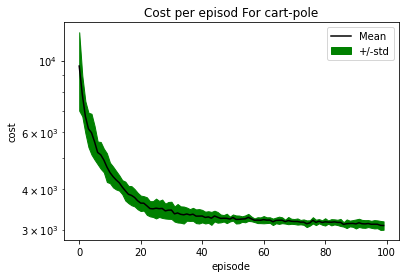

In [6]:
cost_std=np.std(costs_list, axis=0)
cost_ave=np.average(costs_list, axis=0)
x = np.arange(iteration_num)
plt.plot(x,cost_ave,color="black",label='Mean')
plt.fill_between(x,cost_ave+cost_std,cost_ave-cost_std,color="g",label='+/-std')
plt.xlabel("episode")
plt.ylabel("cost")
plt.yscale("log")
plt.title("Cost per episod For cart-pole")
plt.legend()

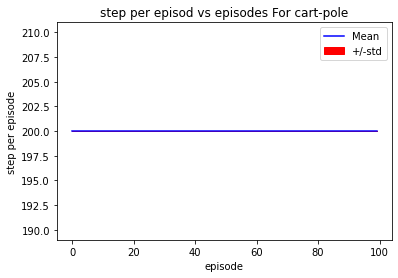

In [17]:
steps_std=np.std(steps, axis=0)
steps_ave=np.mean(steps, axis=0)
#steps_med=np.median(steps, axis=0)
x_ = np.arange(iteration_num)
plt.plot(x_,steps_ave,color="blue",label='Mean')
plt.fill_between(x_,steps_ave+steps_std,steps_ave-steps_std,color="red",label='+/-std')
plt.xlabel("episode")
plt.ylabel("step per episode")
#plt.yscale("log")
plt.title("step per episod vs episodes For cart-pole")
plt.legend()

[ 1.50378937e-01  5.09324194e-02 -1.47680396e+00 -9.59712873e-01
  8.32790857e-01 -6.74297485e-01 -7.65114872e-01  8.41487752e-01
 -1.69328898e-01 -2.61303704e-01  1.35528163e+00  6.32373572e-01
  8.79504368e-01 -6.62592229e-01  6.67130848e-01 -1.21667257e+00
 -1.12782045e+00 -4.32782296e-01  7.12998711e-01 -7.50362896e-01
  4.96381562e-01 -2.71038175e-01 -9.96553916e-01  4.83888129e-01
 -1.19774013e+00  1.03552850e+00 -2.70929215e-01  3.41972692e-01
 -7.65104903e-01  2.82122040e-01  8.32349399e-01 -3.35408365e-01
  5.51427914e-01 -2.17290311e-01 -7.36469933e-01  1.45894305e+00
  1.98823023e-01  1.40603181e-01  1.02097004e+00 -6.53975904e-01
 -1.16362232e-01  6.41439834e-01 -2.26585222e-01 -2.35887626e-02
 -6.39941122e-01 -6.83985315e-01  4.65937668e-01  4.24113854e-01
  1.41079718e+00 -2.17791668e-01 -3.86749008e-01 -1.53631112e-01
  1.31017237e-01 -5.21878734e-01  6.21376000e-01  9.94174203e-03
  8.73715828e-01  2.27168054e-01  2.86271204e-01  1.04906221e+00
  6.61538213e-01  1.44759

In [10]:
_,s=new(theta)

Text(0.5, 0, 'steps')

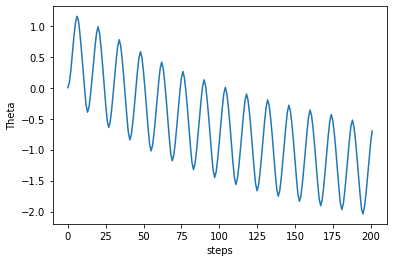

In [16]:

states=np.array(s)
#print(s)
#plt.plot(states[:,0])
plt.plot(states[:,0])
plt.ylabel("x")
plt.xlabel("steps")
plt.title("x")

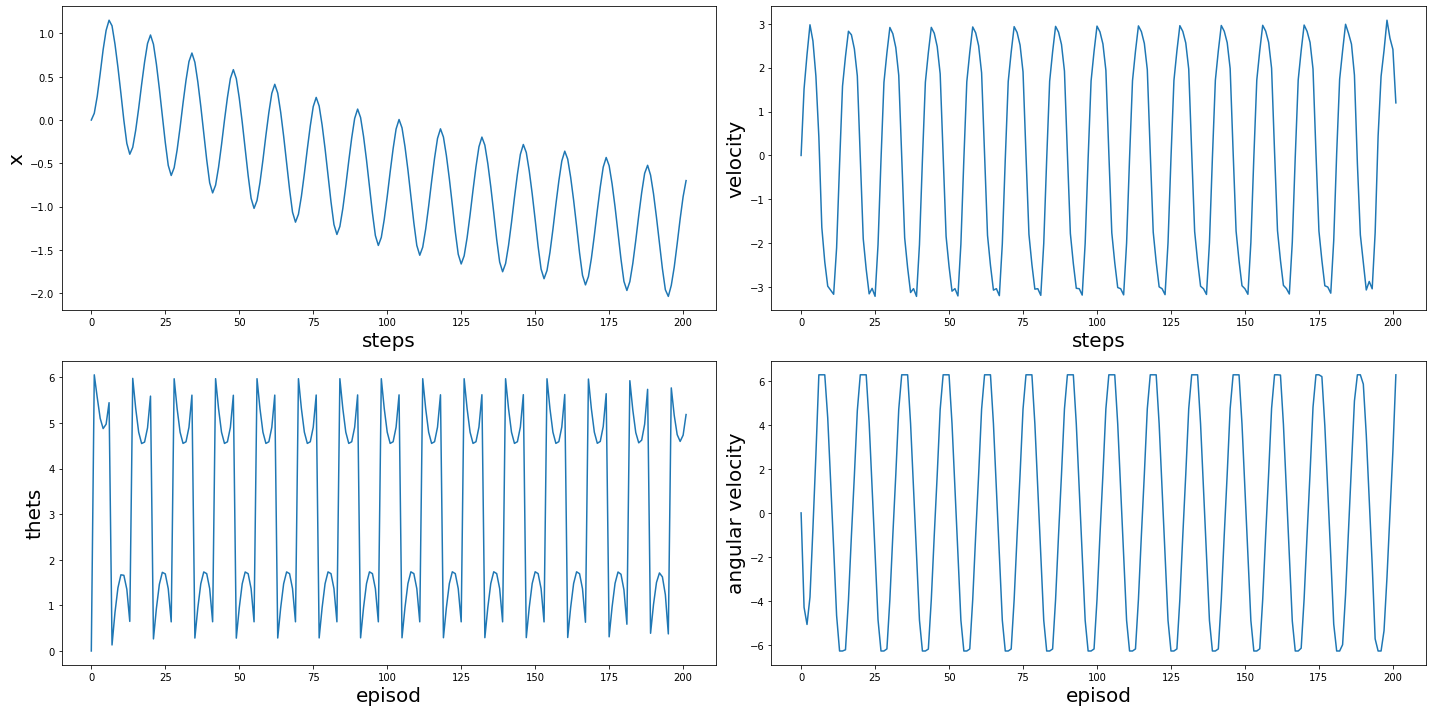

In [22]:
states=np.array(s)


fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.xlabel("steps",fontsize=20)
plt.ylabel("x",fontsize=20)
plt.plot(states[:,0])

plt.subplot(2,2,2)
plt.xlabel("steps",fontsize=20)
plt.ylabel("velocity",fontsize=20)
plt.plot(states[:,1])

plt.subplot(2,2,4)
plt.xlabel("episod",fontsize=20)
plt.ylabel("angular velocity",fontsize=20)
plt.plot(states[:,2])

plt.subplot(2,2,3)
plt.xlabel("episod",fontsize=20)
plt.ylabel("thets",fontsize=20)
plt.plot(states[:,3])
#plt.legend(fontsize=20)
fig.tight_layout()